In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
data = keras.datasets.fashion_mnist
(X_train_full,y_train_full),(X_test,y_test) = data.load_data()
X_train = X_train_full/255.0
X_test = X_test/255.0

4431872/4422102 [==============================] - 0s 0us/step


In [7]:
from threading import active_count
input = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(units=300, activation='relu')(input)
hidden2 = keras.layers.Dense(units=100, activation='relu')(hidden1)
concat = keras.layers.Concatenate()([hidden2,input])
output = keras.layers.Dense(10, activation='softmax')(concat)

model = keras.Model(inputs=input, outputs=output)

In [8]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'],optimizer='sgd')

In [9]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 28, 28)]     0           []                               
                                                                                                  
 dense_7 (Dense)                (None, 28, 300)      8700        ['input_4[0][0]']                
                                                                                                  
 dense_8 (Dense)                (None, 28, 100)      30100       ['dense_7[0][0]']                
                                                                                                  
 concatenate_3 (Concatenate)    (None, 28, 128)      0           ['dense_8[0][0]',                
                                                                  'input_4[0][0]']            

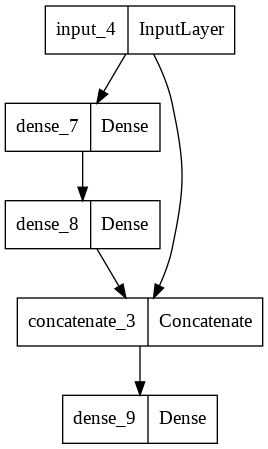

In [10]:
keras.utils.plot_model(model)

### Rather than passing the whole input in concatenate layer, we can train the hidden layers on a few features and then concatenate it with other features later on

In [13]:
X_train.shape

(60000, 28, 28)

In [17]:
X_train_A = X_train[:,:,:15]
X_train_B = X_train[:,:,15:]

In [26]:
input_A = keras.layers.Input(shape=X_train_A.shape[1:])
input_B = keras.layers.Input(shape=X_train_B.shape[1:])
flatten_a = keras.layers.Flatten()(input_A)
flatten_b = keras.layers.Flatten()(input_B)
hidden1 = keras.layers.Dense(units=300, activation='relu')(flatten_a)
hidden2 = keras.layers.Dense(units=100, activation='relu')(hidden1)
concat = keras.layers.Concatenate()([hidden2,flatten_b])
output = keras.layers.Dense(10, activation='softmax')(concat)

model = keras.Model(inputs=[input_A, input_B], outputs=output)

In [27]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'],optimizer='sgd')

In [28]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 28, 15)]     0           []                               
                                                                                                  
 flatten (Flatten)              (None, 420)          0           ['input_11[0][0]']               
                                                                                                  
 dense_18 (Dense)               (None, 300)          126300      ['flatten[0][0]']                
                                                                                                  
 input_12 (InputLayer)          [(None, 28, 13)]     0           []                               
                                                                                            

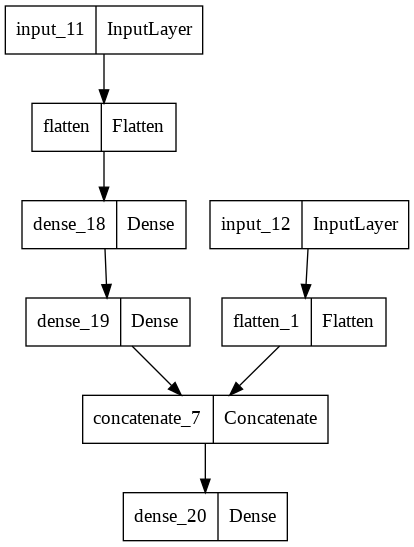

In [29]:
keras.utils.plot_model(model)

In [30]:
history= model.fit(x=[X_train_A, X_train_B], y=y_train_full, validation_split=0.1, epochs=5)

Epoch 1/5
1688/1688 [==============================] - 8s 4ms/step - loss: 0.8519 - accuracy: 0.7279 - val_loss: 0.5990 - val_accuracy: 0.7993
Epoch 2/5
1688/1688 [==============================] - 7s 4ms/step - loss: 0.5508 - accuracy: 0.8131 - val_loss: 0.5005 - val_accuracy: 0.8228
Epoch 3/5
1688/1688 [==============================] - 6s 4ms/step - loss: 0.4943 - accuracy: 0.8272 - val_loss: 0.4653 - val_accuracy: 0.8342
Epoch 4/5
1688/1688 [==============================] - 6s 4ms/step - loss: 0.4644 - accuracy: 0.8372 - val_loss: 0.4640 - val_accuracy: 0.8372
Epoch 5/5
1688/1688 [==============================] - 6s 4ms/step - loss: 0.4453 - accuracy: 0.8436 - val_loss: 0.4363 - val_accuracy: 0.8442


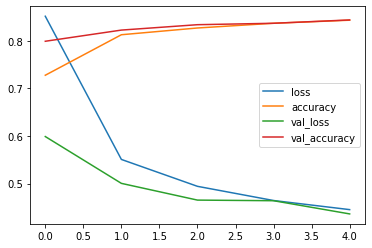

In [31]:
import pandas as pd

history_data = pd.DataFrame(history.history)
history_data.plot()

### The functional API could also be useful if the output required are in different format - for ex- we need both regression and classification model on a dataset. 

### Rather than training different models for each task, we can have different output layer for each task - more efficient since the model learns features that might be useful across tasks.

### or it could just be for regularization

In [ ]:
#in case of multiple outputs, we need to pass loss function for each of the output layer 
#We could give weights to each of the losses for the final loss summation 

#model.compile(loss=['rmsprop', 'mse'], loss_weights=[0.9,0.1], optimizer='sgd')